In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from collections import Counter

#Handling bipartite graphs
import networkx as nx
from networkx.algorithms import bipartite

#Visualization
import scipy.sparse as sparse
import matplotlib.pylab as plt
%matplotlib inline

In [2]:
#@title **Auxiliary functions**
def compute_closeness_centrality(netx_graph):
  """
  The function computes closeness centrality scores for each node in a NetworkX graph passed as netx_graph.
  ----------------
  Output Parameters
  ----------------
    Values of closeness centrality for each node in the graph
  """
  exact_cc = nx.closeness_centrality(netx_graph)
  values_cc = exact_cc.values()
  n_bins = int(max(exact_cc.values())/np.std(list(exact_cc.values())))
  range_bins = int(len(set(values_cc))/n_bins)
  print("Minimum value of closeness centrality ", min(exact_cc.values()))
  print("Maximum value of closeness centrality ", max(exact_cc.values()))
  print("Mean value of closeness centrality ", np.mean(list(exact_cc.values())))
  print("Standard deviation value of closeness centrality ", np.std(list(exact_cc.values())))
  print("The distinct values of closeness centrality are ",len(set(values_cc)))
  bins = [sorted(list(set(values_cc)))[range_bins*x] for x in range(0,n_bins)]
  bins.append(max(exact_cc.values()))
  df=pd.DataFrame({'node':exact_cc.keys(),'cc':exact_cc.values()})
  df['central_range'] = pd.cut(x=df['cc'], bins=bins)
  cr_counts = df.groupby('central_range').size() 
  plot = cr_counts.plot.pie(figsize=(10, 10),autopct='%1.1f%%',cmap='winter')
  plt.legend()
  plt.tight_layout()
  plt.show()
  return values_cc,df

# Data Preprocessing

First we load our graph reading in the edlist from a textfile. In the following we assess how well it fits our assumption of 'Bipartiteness'.

In [3]:
fgraph_C = pd.read_csv('fgraph_C.txt', sep=" ", header=None)
fgraph_C = fgraph_C.drop_duplicates()
display(fgraph_C)

,0,1
0,a20.c,compiler_types.h
1,a20.c,linkage.h
2,a20.c,export.h
3,a20.c,compiler.h
4,a20.c,types.h
...,...,...
2743601,irqbypass.mod.c,error-injection.h
2743606,irqbypass.mod.c,utsrelease.h
2743607,irqbypass.mod.c,build-salt.h
2743608,irqbypass.mod.c,elfnote.h


In [4]:
print("The number of relationships of type .c->.h is ",Counter(fgraph_C[0].str.contains("\.c") & fgraph_C[1].str.contains("\.h"))[True])
print("The number of relationships of type .h->.h is ",Counter(fgraph_C[0].str.contains("\.h") & fgraph_C[1].str.contains("\.h"))[True])
print("The number of relationships of type .c->.c is ",Counter(fgraph_C[0].str.contains("\.c") & fgraph_C[1].str.contains("\.c"))[True])
print("The number of relationships of type .h->.c is ",Counter(fgraph_C[0].str.contains("\.h") & fgraph_C[1].str.contains("\.c"))[True])

The number of relationships of type .c->.h is  1884257
The number of relationships of type .h->.h is  3
The number of relationships of type .c->.c is  53
The number of relationships of type .h->.c is  0


In [5]:
# assess the couple of edges within the h level
fgraph_C[fgraph_C[0].str.contains("\.h") & fgraph_C[1].str.contains("\.h")]

,0,1
2547497,autoconf.h,csmake-pre-defs.h
2547498,compiler_types.h,compiler-gcc.h
2547499,kconfig.h,csmake-pre-defs.h


In [6]:
# assess the couple of edges within the c level
fgraph_C[fgraph_C[0].str.contains("\.c") & fgraph_C[1].str.contains("\.c")]

,0,1
423,cmdline.c,cmdline.c
465,cpuflags.c,cpuflags.c
703,early_serial_console.c,early_serial_console.c
1929,kaslr.c,kaslr.c
1932,kaslr.c,ctype.c
1933,kaslr.c,cmdline.c
2188,kaslr_64.c,ident_map.c
2429,misc.c,decompress_unxz.c
2433,misc.c,xz_crc32.c
2435,misc.c,xz_dec_stream.c


## Bipartite Graphs
Edges linking nodes that belong to the same sets need to be removed.

The code below drops edges between nodes of same set. As we have shown before those are only a couple of edges and negledgible compared to to total size of the graph.

In [7]:
# find edges
hh_index = fgraph_C[fgraph_C[0].str.contains("\.h") & fgraph_C[1].str.contains("\.h")].index
cc_index = fgraph_C[fgraph_C[0].str.contains("\.c") & fgraph_C[1].str.contains("\.c")].index

# drop edges
fgraph_C = fgraph_C.drop(hh_index)
fgraph_C = fgraph_C.drop(cc_index)

# assess if graph is now bipartite
print("The number of relationships of type .c->.h is ",Counter(fgraph_C[0].str.contains("\.c") & fgraph_C[1].str.contains("\.h"))[True])
print("The number of relationships of type .h->.h is ",Counter(fgraph_C[0].str.contains("\.h") & fgraph_C[1].str.contains("\.h"))[True])
print("The number of relationships of type .c->.c is ",Counter(fgraph_C[0].str.contains("\.c") & fgraph_C[1].str.contains("\.c"))[True])
print("The number of relationships of type .h->.c is ",Counter(fgraph_C[0].str.contains("\.h") & fgraph_C[1].str.contains("\.c"))[True])

The number of relationships of type .c->.h is  1884257
The number of relationships of type .h->.h is  0
The number of relationships of type .c->.c is  0
The number of relationships of type .h->.c is  0


#### Generating Bipartite Graph 

After dropping edges between nodes of the same sets we can now create our bipartite graph as well as projections for both the c and the h level. 

In [8]:
compile_graph = nx.Graph() 

# Add nodes with the node attribute "bipartite" (This is a convention when using bipartite graphs in networkx)
compile_graph.add_nodes_from(list(set(fgraph_C[0])), bipartite=0)
compile_graph.add_nodes_from(list(set(fgraph_C[1])), bipartite=1)

# Add edges (only between nodes of opposite node sets)
compile_graph.add_edges_from(list(fgraph_C.itertuples(index=False, name=None)))

In [9]:
levels = pd.DataFrame([(node, d['bipartite']) for node, d in compile_graph.nodes(data=True)], columns=['node', 'level'])
degrees = pd.DataFrame([d for d in compile_graph.degree()], columns=['node', 'degree'])
compile_df = pd.merge(degrees, levels, on='node', how='inner')

In [10]:
nodes, edges = compile_graph.order(), compile_graph.size()
avg_deg = 2*float(edges)/nodes
print("Nodes: ", nodes)
print("Edges: ", edges)
print("Average degree: ", avg_deg)
print("CC: ", len(list(nx.connected_components(compile_graph))))

Nodes:  9663
Edges:  1884258
Average degree:  389.99441167339336
CC:  2


Our node degrees are distributed with mean 390.0 and median 219.0 



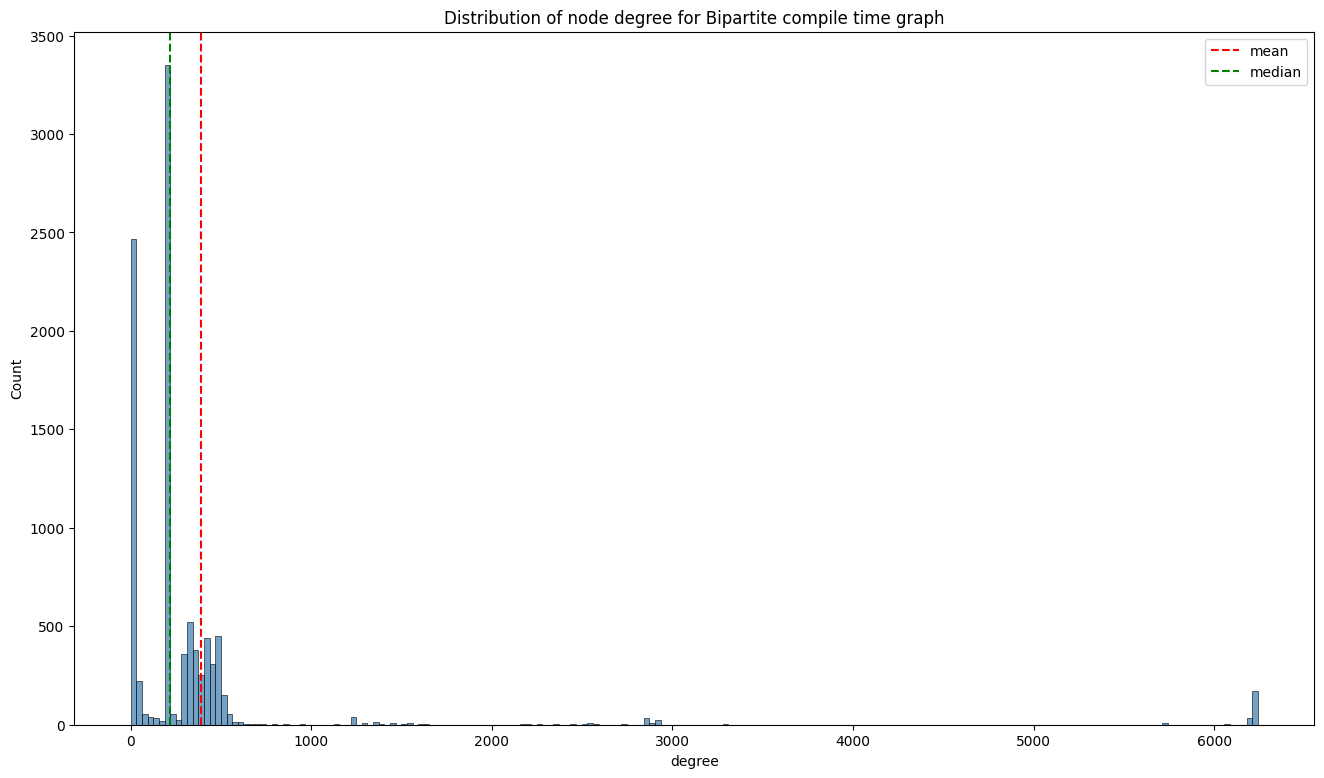

In [11]:
print(f'Our node degrees are distributed with mean {np.round(compile_df.degree.mean(), 0)} and median {compile_df.degree.median()} \n')
fig, ax = plt.subplots(figsize=(16, 9))
ax.axvline(x=compile_df.degree.mean(), c='red', ls='--', label='mean')
ax.axvline(x=compile_df.degree.median(), c='green', ls='--', label='median')
sns.histplot(x=compile_df.degree, ax=ax, bins=200, color='steelblue')
ax.set_title('Distribution of node degree for Bipartite compile time graph')
plt.legend()
plt.show()

   degree  count
0     219   3289
1       1    617
2       2    377
3       3    225
4       4    178
5       5    146
6       7     89
7       6     82
8      10     78
9       8     72


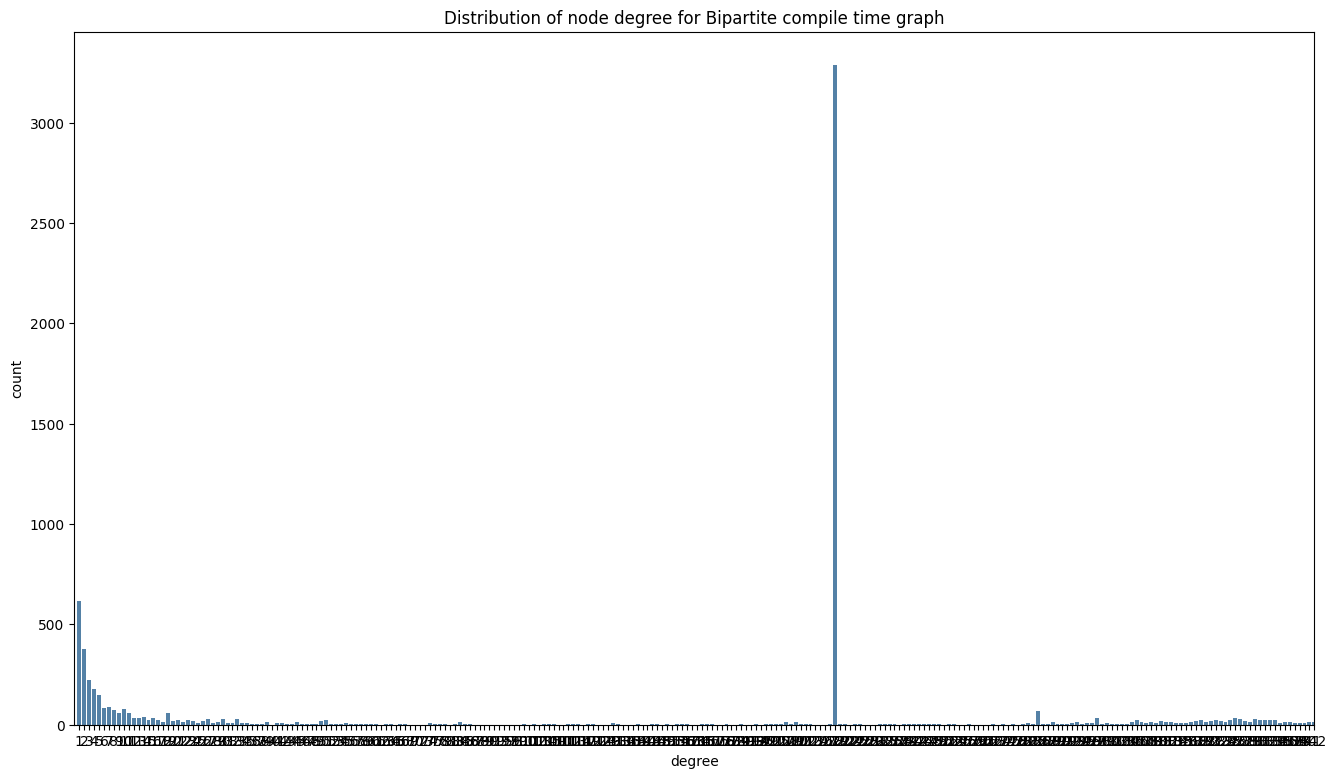

In [12]:
# count how often each degree appears
degrees_count = compile_df.degree.value_counts().reset_index().rename(columns={'index':'degree', 'degree':'count'})

# top 10 degrees
print(degrees_count.head(10))

# plot distribution of degrees
fig, ax = plt.subplots(figsize=(16, 9))
sns.barplot(x=degrees_count.degree, y=degrees_count['count'], ax=ax, color='steelblue')
ax.set_title('Distribution of node degree for Bipartite compile time graph')
ax.set_xlim(-1, 250)
plt.show()

In [29]:
compile_df.loc[compile_df['level']==0].degree.max()

775

In [37]:
# max degree nodes
print(compile_df.loc[(compile_df['level']==0) & (compile_df['degree']==775)])
print(compile_df.loc[(compile_df['level']==1) & (compile_df['degree']==6243)])

        node  degree  level
4162  main.c     775      0
         node  degree  level
8662  types.h    6243      1


In [14]:
print('max degrees per level (h and c)')
print('\n.c:')
print(compile_df.loc[compile_df['level']==0].degree.value_counts().head(5))
print('\n.h:')
print(compile_df.loc[compile_df['level']==1].degree.value_counts().head(5))

max degrees per level (h and c)

.c:
219    3288
286      68
326      32
415      31
475      29
Name: degree, dtype: int64

.h:
1    616
2    377
3    223
4    156
5    146
Name: degree, dtype: int64


An interesting result from our first look at the graph: Our nodes cluster at the degree of 219 i.e. about 1/3 of our nodes (3289 nodes) have exactly degree 219, second most with only 617 nodes is degree 1, then 2, 3, ... The nodes with degree 219 are all .c files. The .h files follow a 1/rank like distribution.

#### Biadjacency matrix 
For a bipartite graph a typical adjacency matrix would be less efficient representation because it would contain a big number of zeros.

In [15]:
top_nodes = {n for n, d in compile_graph.nodes(data=True) if d["bipartite"] == 0}
bottom_nodes = set(compile_graph) - top_nodes
badj = bipartite.biadjacency_matrix(compile_graph,top_nodes)

/tmp/ipykernel_15035/3177996608.py:3: FutureWarning: biadjacency_matrix will return a scipy.sparse array instead of a matrix in NetworkX 3.0
  badj = bipartite.biadjacency_matrix(compile_graph,top_nodes)


In [16]:
badj.shape

(6267, 3396)

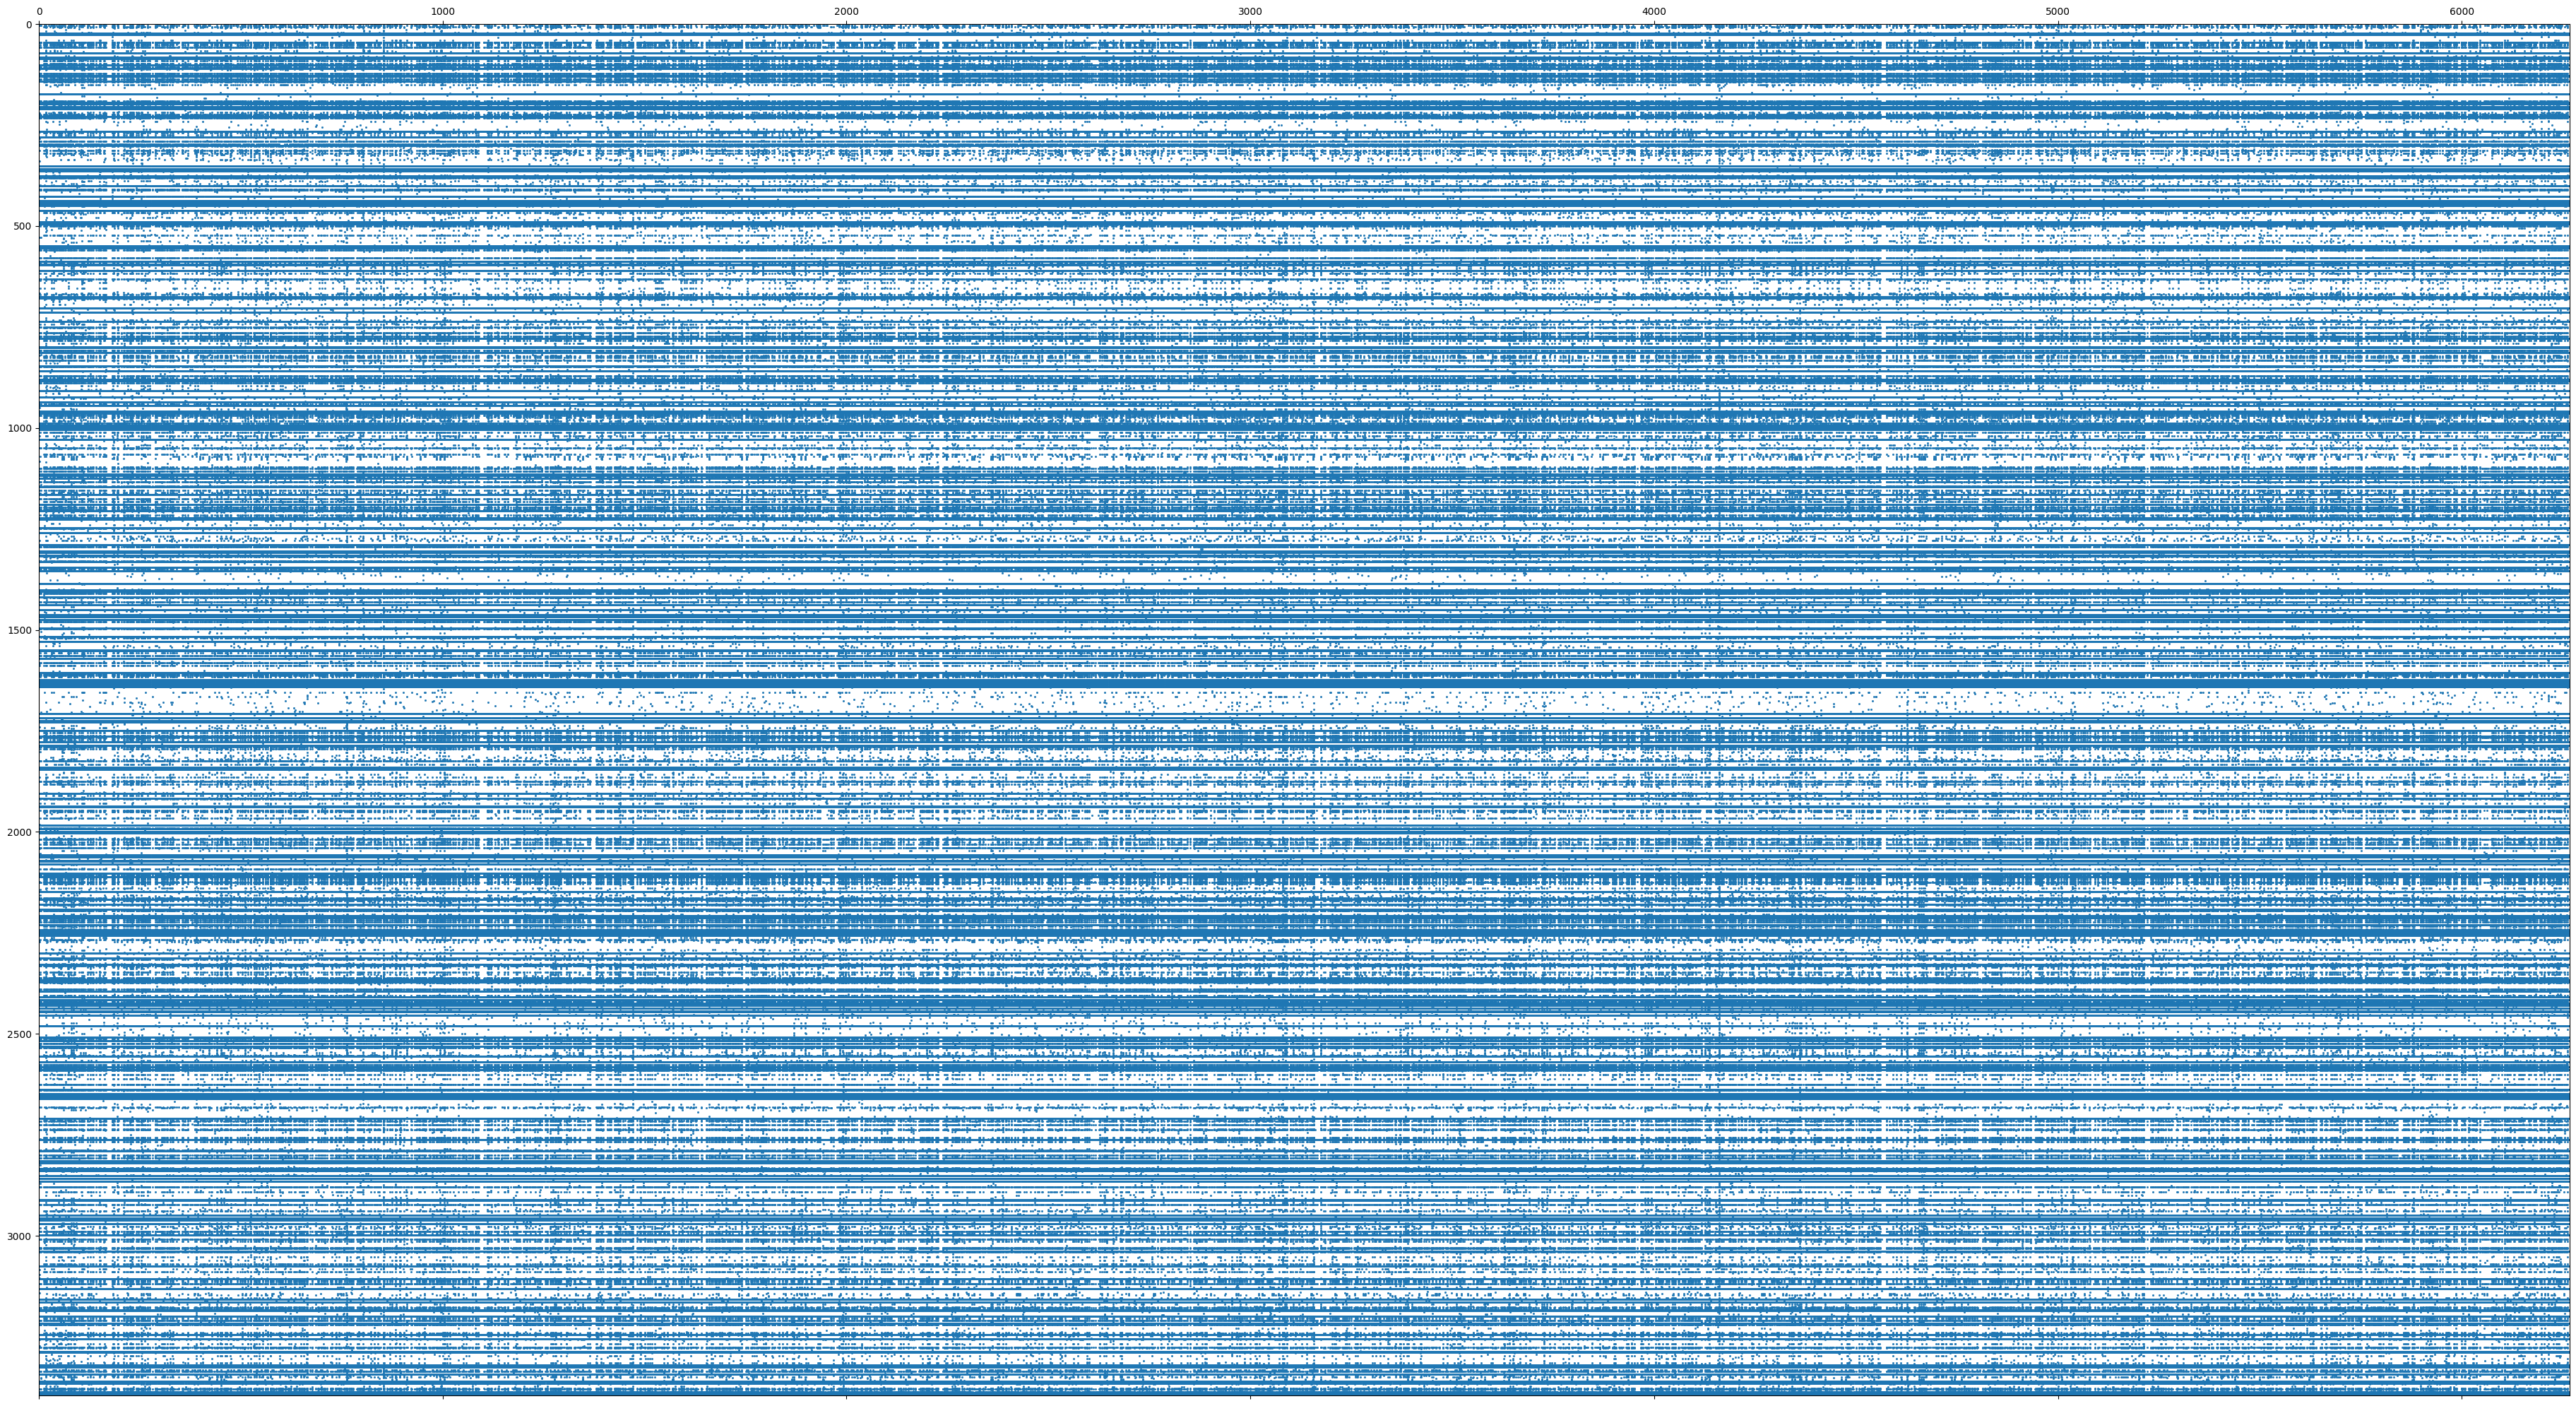

In [17]:
plt.figure(figsize=(40,20))
plt.spy(badj.T, markersize=1)
plt.tight_layout()

#### Basic graph projections

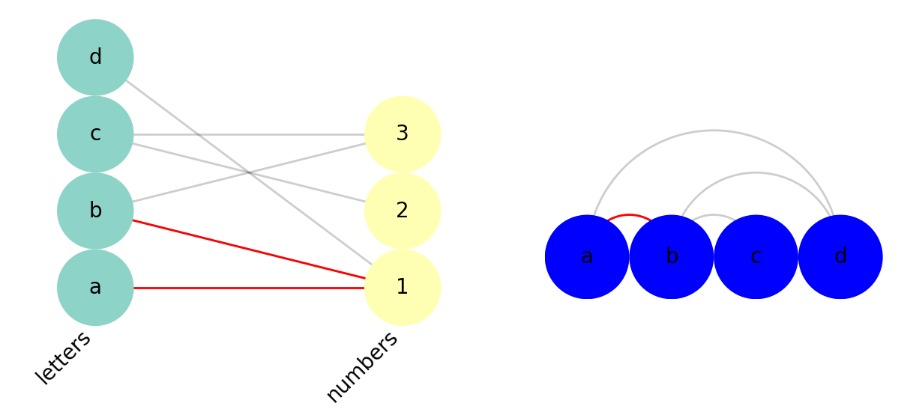

The following operations take a while to be computed.

In [18]:
h_graph = bipartite.projected_graph(compile_graph, bottom_nodes)

In [67]:
c_graph = bipartite.projected_graph(compile_graph, top_nodes)

In [68]:
print("Example of edges of the projection onto the c files sets",list(c_graph.edges(data=True))[0:5])
print("Example of edges of the projection onto the h files sets",list(h_graph.edges(data=True))[0:5])

Example of edges of the projection onto the c files sets [('qed_roce.c', 'snd-hda-codec-ca0132.mod.c', {}), ('qed_roce.c', 'qede_main.c', {}), ('qed_roce.c', 'nfnetlink_osf.mod.c', {}), ('qed_roce.c', 'i2c-sis630.mod.c', {}), ('qed_roce.c', 'x86_pkg_temp_thermal.mod.c', {})]
Example of edges of the projection onto the h files sets [('bfi_reg.h', 'dma-mapping.h', {}), ('bfi_reg.h', 'wait_bit.h', {}), ('bfi_reg.h', 'thread_info.h', {}), ('bfi_reg.h', 'interrupt.h', {}), ('bfi_reg.h', 'ipv4.h', {})]


##### *Basic* Analysis: Graph properties

In [71]:
nodes, edges = c_graph.order(), c_graph.size()
avg_deg = np.round(2*float(edges)/nodes,0)
print("Nodes: ", nodes)
print("Edges: ", edges)
print(f"Edges missing until fully connected: {nodes*(nodes-1)/2-edges}")
print("Average degree: ", avg_deg)
print("CC: ", len(list(nx.connected_components(c_graph))))

Nodes:  6267
Edges:  19610948
Edges missing until fully connected: 23563.0
Average degree:  6258.0
CC:  2


In [72]:
c_graph_df = pd.DataFrame([d for d in c_graph.degree()], columns=['node', 'degree'])

Our node degrees are distributed with mean 6258.0 and median 6264.0 



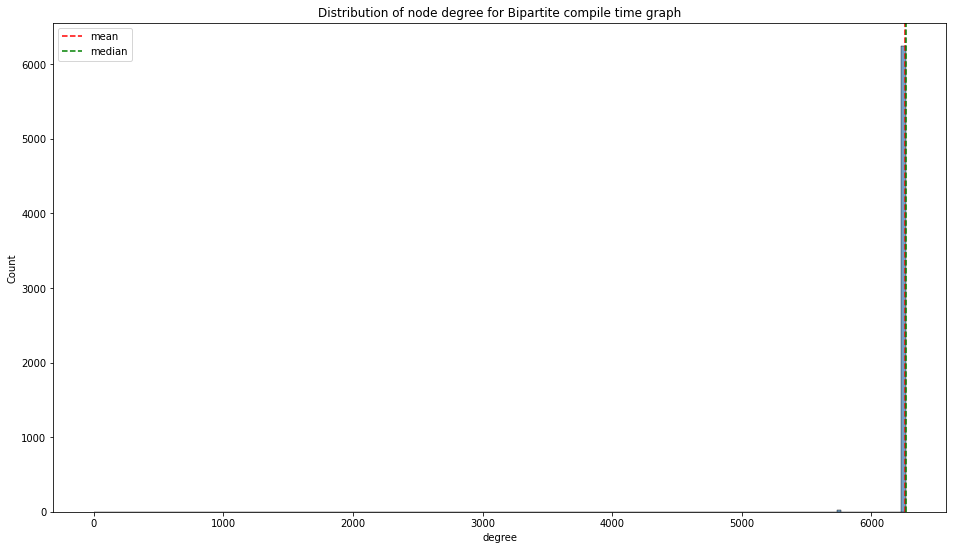

In [73]:
print(f'Our node degrees are distributed with mean {np.round(c_graph_df.degree.mean(), 0)} and median {c_graph_df.degree.median()} \n')
fig, ax = plt.subplots(figsize=(16, 9))
ax.axvline(x=c_graph_df.degree.mean(), c='red', ls='--', label='mean')
ax.axvline(x=c_graph_df.degree.median(), c='green', ls='--', label='median')
sns.histplot(x=c_graph_df.degree, ax=ax, bins=200, color='steelblue')
ax.set_title('Distribution of node degree for Bipartite compile time graph')
plt.legend()
plt.show()

   degree  count
0    6264   5717
1    6243    518
2    5739     21
3    6242      6
4       1      2
5    6263      2
6    6235      1


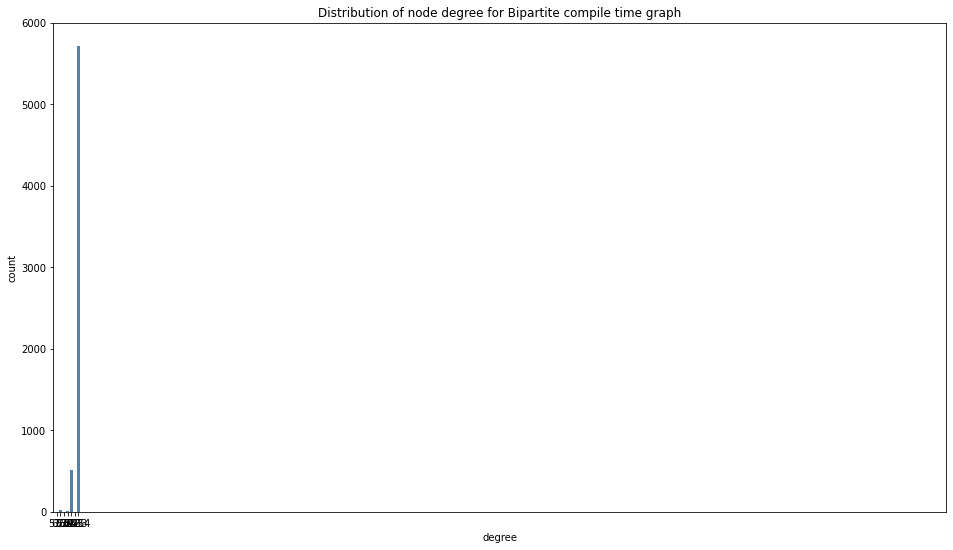

In [74]:
# count how often each degree appears
c_degrees_count = c_graph_df.degree.value_counts().reset_index().rename(columns={'index':'degree', 'degree':'count'})

# top 10 degrees
print(c_degrees_count.head(10))

# plot distribution of degrees
fig, ax = plt.subplots(figsize=(16, 9))
sns.barplot(x=c_degrees_count.degree, y=c_degrees_count['count'], ax=ax, color='steelblue')
ax.set_title('Distribution of node degree for Bipartite compile time graph')
ax.set_xlim(-1, 250)
plt.show()

In [77]:
A_c = nx.adjacency_matrix(c_graph).toarray().T

/tmp/ipykernel_142580/2429593408.py:1: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A_c = nx.adjacency_matrix(c_graph).toarray().T


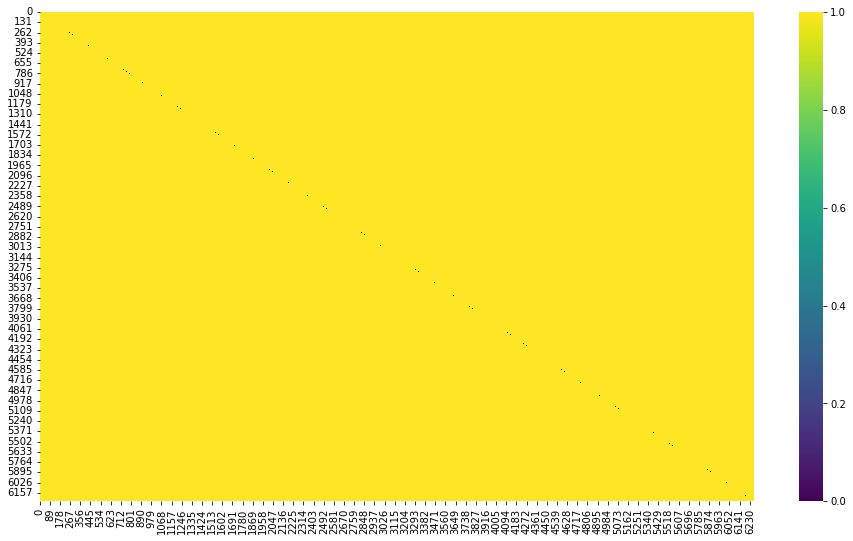

In [78]:
fig, ax = plt.subplots(figsize=(16, 9))
sns.heatmap(A_c, ax=ax, cmap='viridis')
plt.show()

In [19]:
nodes, edges = h_graph.order(), h_graph.size()
avg_deg = float(edges)/nodes
print("Nodes: ", nodes)
print("Edges: ", edges)
print("Average degree: ", avg_deg)
print("CC: ", len(list(nx.connected_components(h_graph))))

Nodes:  3396
Edges:  1592394
Average degree:  468.9028268551237
CC:  2


In [20]:
h_graph_df = pd.DataFrame([d for d in h_graph.degree()], columns=['node', 'degree'])

Our node degrees are distributed with mean 938.0 and median 522.0 



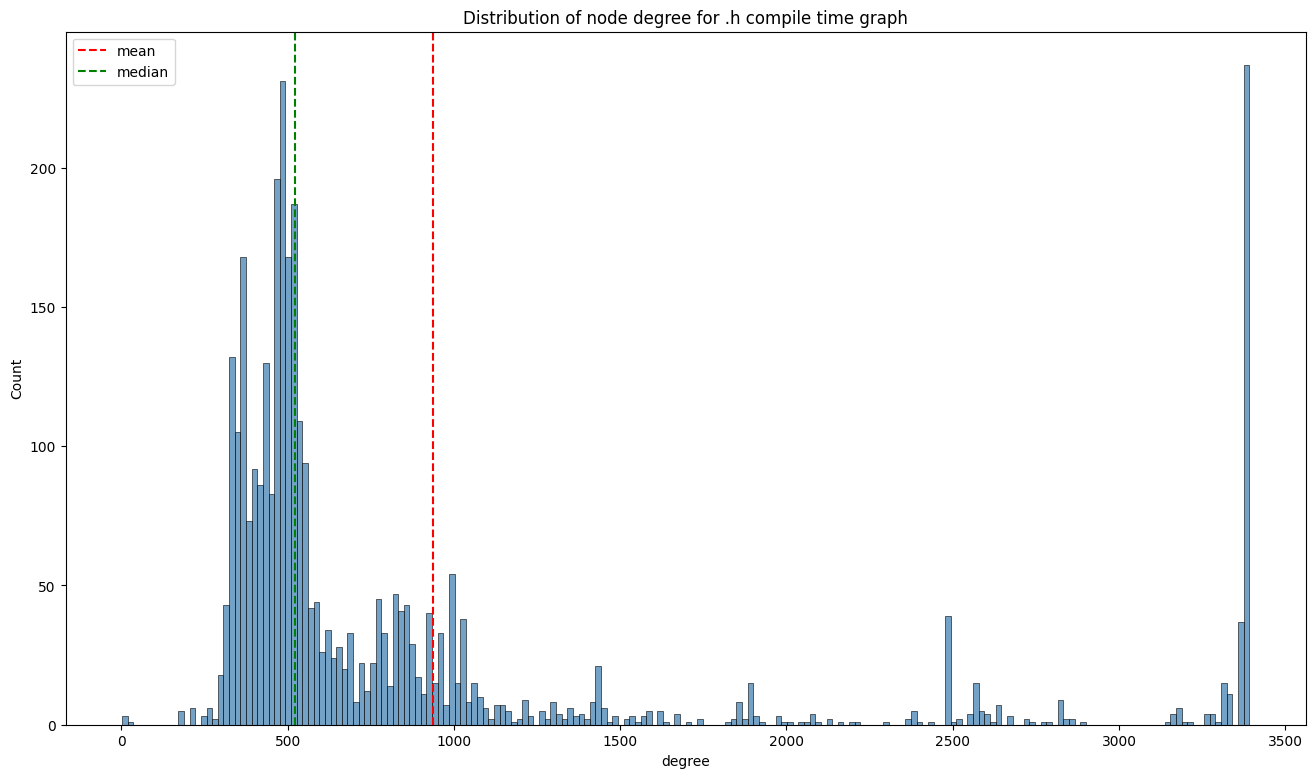

In [38]:
print(f'Our node degrees are distributed with mean {np.round(h_graph_df.degree.mean(), 0)} and median {h_graph_df.degree.median()} \n')
fig, ax = plt.subplots(figsize=(16, 9))
ax.axvline(x=h_graph_df.degree.mean(), c='red', ls='--', label='mean')
ax.axvline(x=h_graph_df.degree.median(), c='green', ls='--', label='median')
sns.histplot(x=h_graph_df.degree, ax=ax, bins=200, color='steelblue')
ax.set_title('Distribution of node degree for .h compile time graph')
plt.legend()
plt.show()

   degree  count
0    3391    134
1    3386     35
2    3371     33
3     517     32
4    1001     30
5     485     28
6    3392     28
7    2492     28
8     493     27
9    3380     25


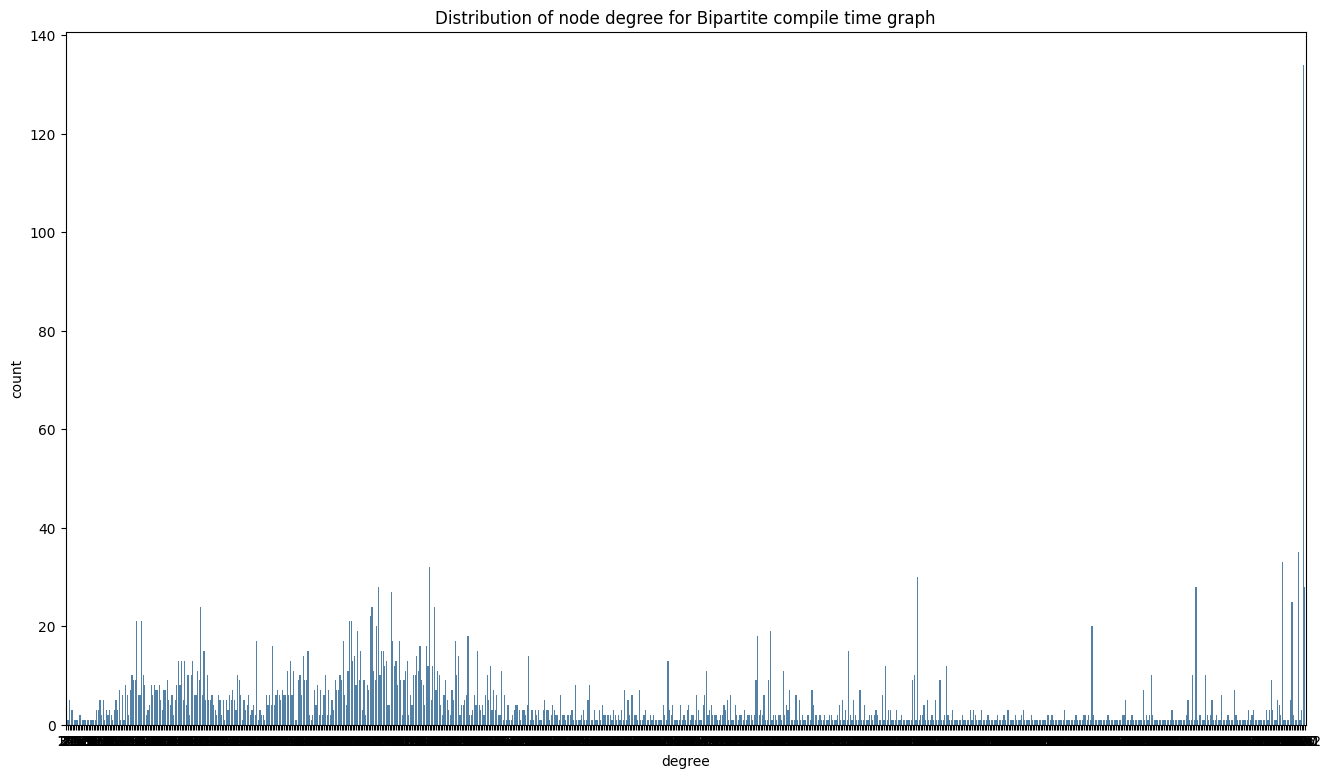

In [39]:
# count how often each degree appears
h_degrees_count = h_graph_df.degree.value_counts().reset_index().rename(columns={'index':'degree', 'degree':'count'})

# top 10 degrees
print(h_degrees_count.head(10))

# plot distribution of degrees
fig, ax = plt.subplots(figsize=(16, 9))
sns.barplot(x=h_degrees_count.degree, y=h_degrees_count['count'], ax=ax, color='steelblue')
ax.set_title('Distribution of node degree for Bipartite compile time graph')
# ax.set_xlim(-1, 250)
plt.show()

In [83]:
A_h = nx.adjacency_matrix(h_graph).toarray().T

/tmp/ipykernel_142580/2719348686.py:1: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A_h = nx.adjacency_matrix(h_graph).toarray().T


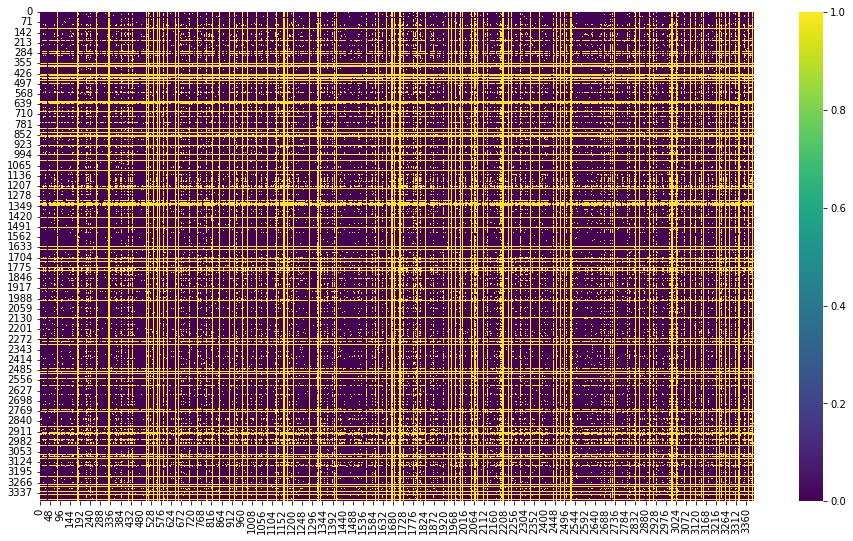

In [84]:
fig, ax = plt.subplots(figsize=(16, 9))
sns.heatmap(A_h, ax=ax, cmap='viridis')
plt.show()